In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

                         Date       Open        High        Low       Close  \
245 2023-01-23 00:00:00-05:00  99.129997  101.400002  98.750000  101.209999   
246 2023-01-24 00:00:00-05:00  99.550003  101.089996  98.699997   99.209999   
247 2023-01-25 00:00:00-05:00  97.199997   97.720001  95.262001   96.730003   
248 2023-01-26 00:00:00-05:00  98.279999   99.209999  96.820000   99.160004   
249 2023-01-27 00:00:00-05:00  99.050003  101.580002  98.970001  100.709999   

      Adj Close    Volume  
245  101.209999  31791800  
246   99.209999  27391400  
247   96.730003  31000900  
248   99.160004  24542100  
249  100.709999  29011900  


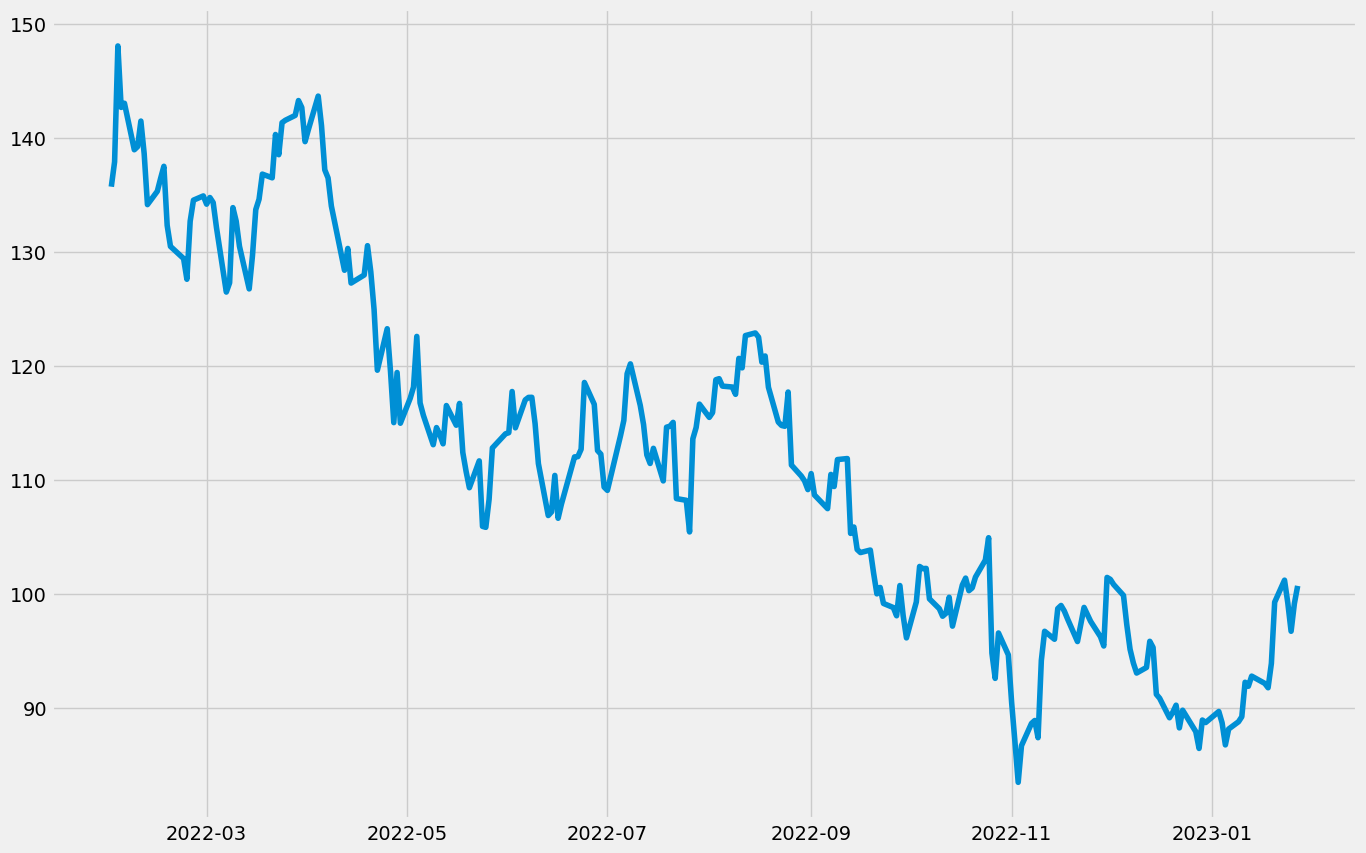

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

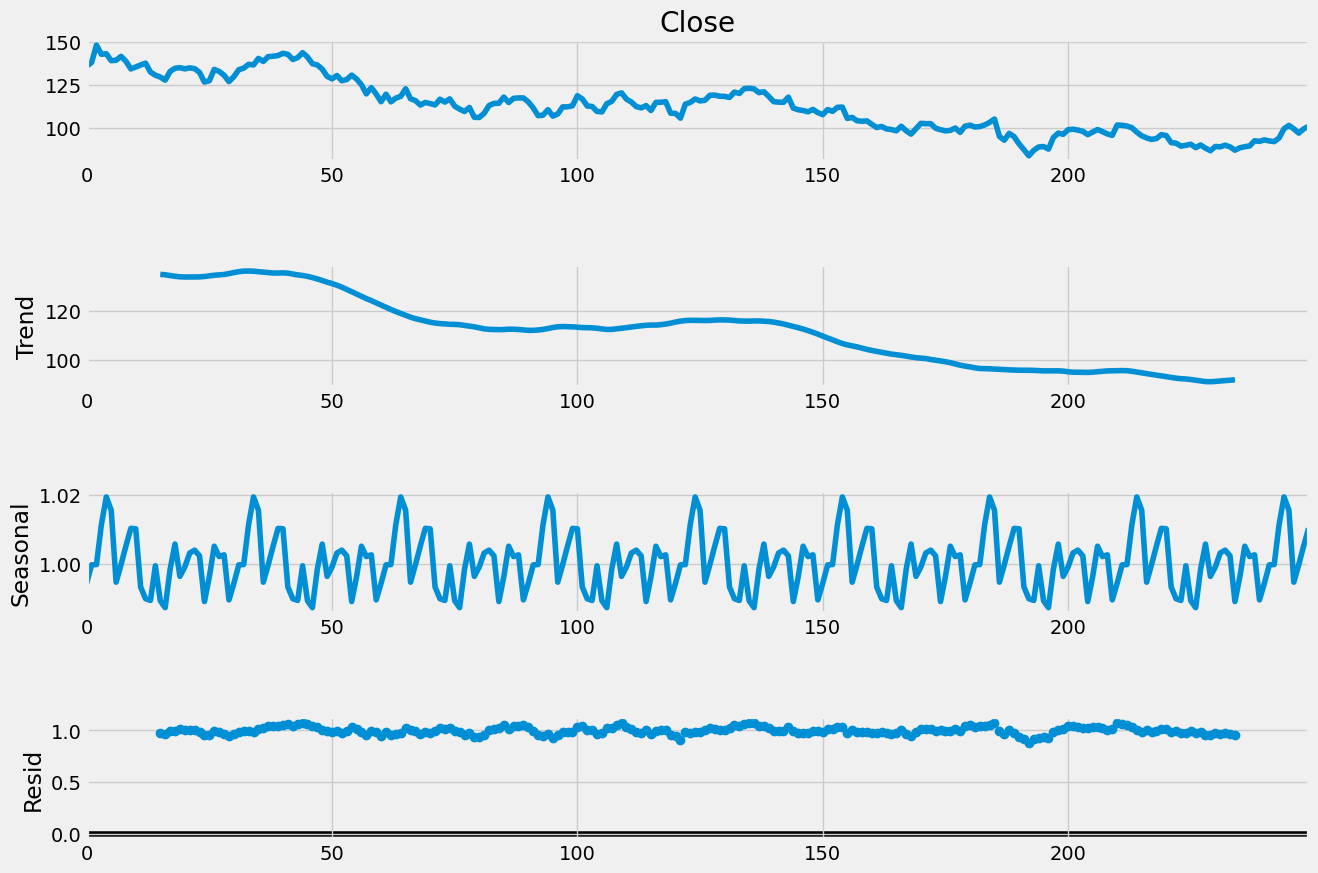

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

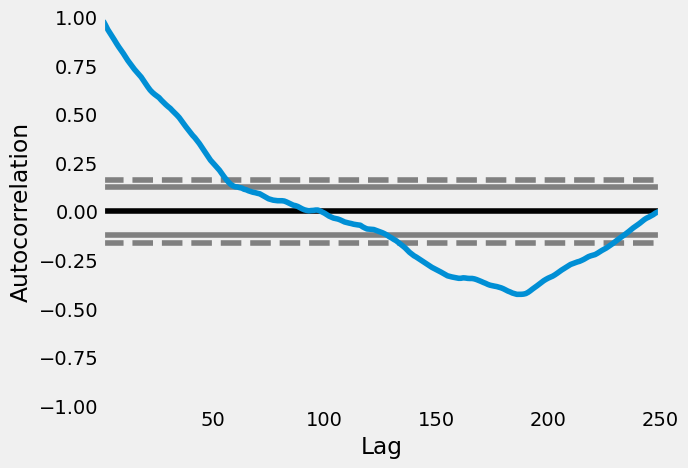

In [4]:
pd.plotting.autocorrelation_plot(data["Close"])

/home/rohit/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


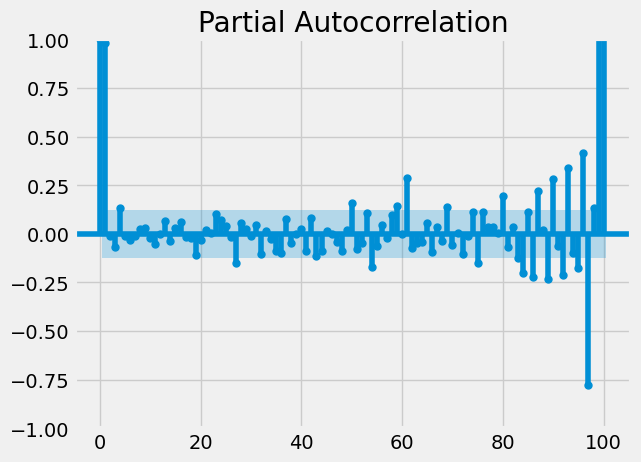

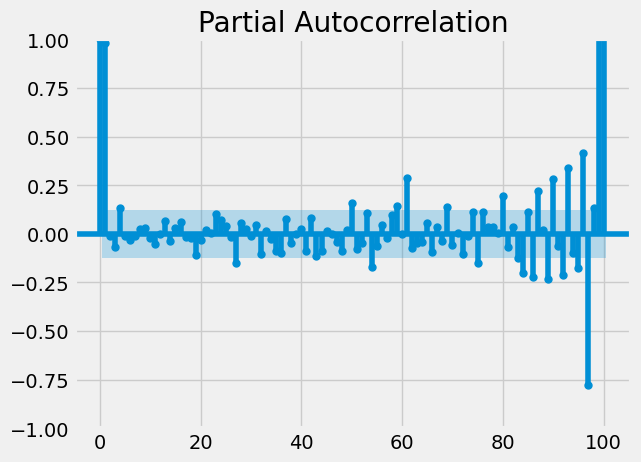

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [6]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

/home/rohit/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/rohit/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -602.792
Date:                Sun, 29 Jan 2023   AIC                           1221.584
Time:                        11:37:09   BIC                           1249.724
Sample:                             0   HQIC                          1232.911
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0339      0.276      0.123      0.902      -0.507       0.575
ar.L2         -0.8522      0.260     -3.276      0.001      -1.362      -0.342
ar.L3         -0.1107      0.085     -1.297      0.1

In [7]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      135.698463
2      137.797893
3      147.435604
4      141.784873
          ...    
245     98.905227
246    100.421568
247     98.677303
248     97.045198
249     99.770738
Name: predicted_mean, Length: 250, dtype: float64


In [8]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/home/rohit/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/rohit/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47967D+00    |proj g|=  9.42273D-02


 This problem is unconstrained.



At iterate    5    f=  2.41406D+00    |proj g|=  1.46801D-02

At iterate   10    f=  2.40889D+00    |proj g|=  4.03068D-02

At iterate   15    f=  2.38060D+00    |proj g|=  3.70755D-02

At iterate   20    f=  2.36890D+00    |proj g|=  1.45526D-02

At iterate   25    f=  2.36612D+00    |proj g|=  7.86671D-03

At iterate   30    f=  2.36351D+00    |proj g|=  8.63988D-03

At iterate   35    f=  2.36328D+00    |proj g|=  1.27972D-03

At iterate   40    f=  2.36275D+00    |proj g|=  1.33721D-02

At iterate   45    f=  2.36249D+00    |proj g|=  1.85991D-03

At iterate   50    f=  2.36248D+00    |proj g|=  3.72860D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/rohit/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -590.620
Date:                            Sun, 29 Jan 2023   AIC                           1211.240
Time:                                    11:38:13   BIC                           1263.261
Sample:                                         0   HQIC                          1232.208
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0718      0.262     -0.274      0.784      -0.585       0.442
ar.L2         -0.8737      0.211   

In [9]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    100.547789
251     98.873089
252     98.119141
253     99.110250
254     99.924117
255     99.239899
256     98.593760
257     98.689439
258     97.955450
259     96.818132
260     96.327343
Name: predicted_mean, dtype: float64


<AxesSubplot: >

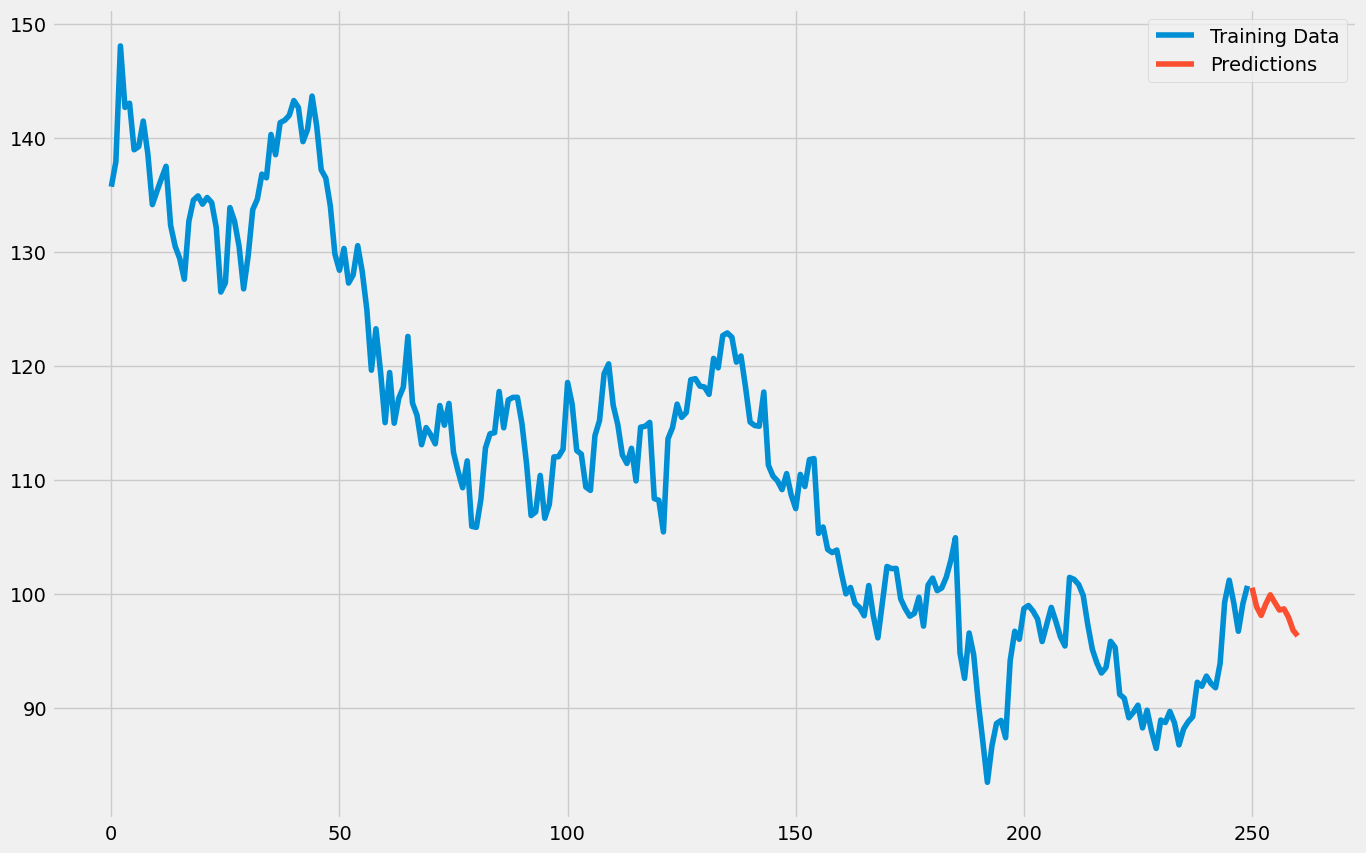

In [10]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [2]:
print("rohit"+' '+"palsaniya")

rohit palsaniya


In [3]:
print("210020108")

210020108
